# Projeto 2 Ciência dos Dados

### Contexto

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

### Informação dos atributos da base de dados

* 1) id: unique identifier
* 2) gender: "Male", "Female" or "Other"
* 3) age: age of the patient
* 4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
* 5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
* 6) ever_married: "No" or "Yes"
* 7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
* 8) Residence_type: "Rural" or "Urban"
* 9) avg_glucose_level: average glucose level in blood
* 10) bmi: body mass index
* 11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
* 12) stroke: 1 if the patient had a stroke or 0 if not
* *Note: "Unknown" in smoking_status means that the information is unavailable for this patient

#### Bibliotecas importadas

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import emoji
import seaborn as sns

#### Diretório e base de dados

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\adney\OneDrive - Insper - Institudo de Ensino e Pesquisa\Documentos\2° semestre - Insper\Ciência dos Dados\Projeto2Cdados_AdneyLister\Projeto2-Cdados


In [3]:
stroke = pd.read_csv("healthcare-dataset-stroke-data.csv")
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
stroke.shape[0]

5110

#### Limpeza de dados

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

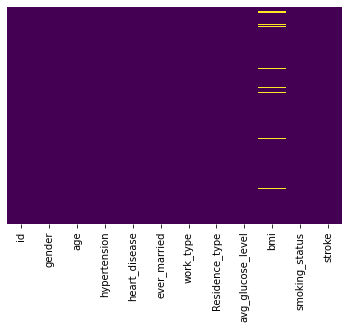

In [5]:
#heatmap da biblioteca seaborn para identificar elementos nulos ,bem como, o comando isnull que verifica linhas nulas
sns.heatmap(stroke.isnull(),yticklabels=False,cbar=False,cmap="viridis")
stroke.isnull().sum()

In [6]:
stroke.dropna(inplace=True)
stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [7]:
stroke.shape[0]

4909

In [8]:
stroke.gender.value_counts()

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

In [9]:
filtro = stroke.gender != 'Other'
stroke = stroke[filtro]

In [10]:
stroke.gender.value_counts()

Female    2897
Male      2011
Name: gender, dtype: int64

In [11]:
stroke = stroke.drop(columns = ['id','ever_married','work_type','Residence_type'])
stroke

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,105.92,32.5,never smoked,1
3,Female,49.0,0,0,171.23,34.4,smokes,1
4,Female,79.0,1,0,174.12,24.0,never smoked,1
5,Male,81.0,0,0,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,166.29,25.6,formerly smoked,0


#### Análises

In [12]:
stroke_yes = stroke.loc[stroke["stroke"] == 1]
stroke_no = stroke.loc[stroke["stroke"] == 0]

# Idade

In [13]:
stroke.age.describe()

count    4908.000000
mean       42.868810
std        22.556128
min         0.080000
25%        25.000000
50%        44.000000
75%        60.000000
max        82.000000
Name: age, dtype: float64

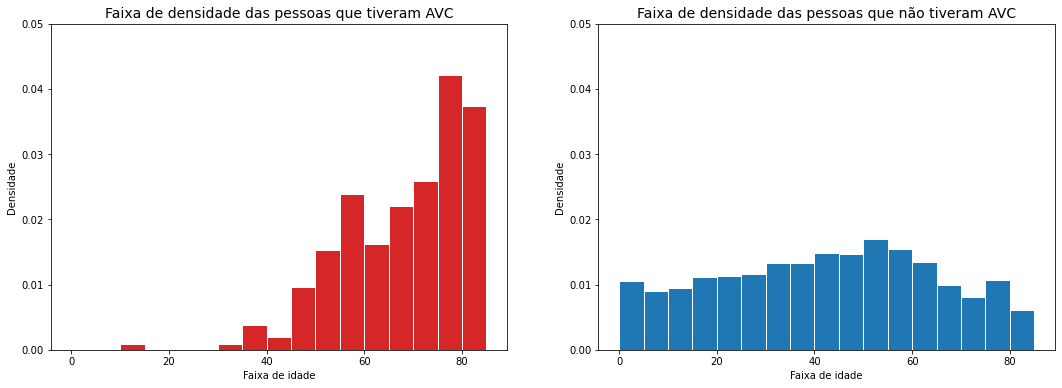

In [14]:
age_range = np.arange(0, 90,5)

plt.figure(figsize=(18,6))

plt.subplot(121)
plt.hist(stroke_yes.age, bins = age_range, edgecolor='white', density = True, color = 'tab:red')
plt.title("Faixa de densidade das pessoas que tiveram AVC", size=14)
plt.xlabel("Faixa de idade")
plt.ylabel("Densidade")
plt.ylim(0,0.05)

plt.subplot(122)
plt.hist(stroke_no.age, bins = age_range, edgecolor='white', density = True, color = 'tab:blue')
plt.title("Faixa de densidade das pessoas que não tiveram AVC", size=14)
plt.xlabel("Faixa de idade")
plt.ylabel("Densidade")
plt.ylim(0,0.05)


plt.show()

# Hipertensão

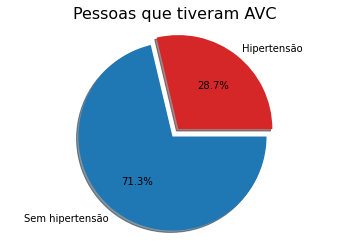

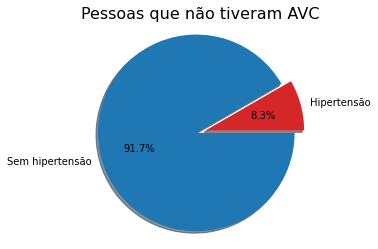

In [15]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Hipertensão', 'Sem hipertensão'

sizes = [stroke_yes.hypertension.value_counts()[1]/stroke_yes.shape[0],
         stroke_yes.hypertension.value_counts()[0]/stroke_yes.shape[0],
         
         stroke_no.hypertension.value_counts()[1]/stroke_no.shape[0],
         stroke_no.hypertension.value_counts()[0]/stroke_no.shape[0] ]

explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')


fig1, ax1 = plt.subplots()
ax1.pie(sizes[0:2], explode=explode, labels=labels,colors = ['tab:red','tab:blue'], autopct='%1.1f%%',
        shadow=True, startangle=0)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Pessoas que tiveram AVC",size = 16)
plt.show()


fig1, ax1 = plt.subplots()
ax1.pie(sizes[2:4], explode=explode, labels=labels,colors = ['tab:red','tab:blue'], autopct='%1.1f%%',
        shadow=True, startangle=0)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Pessoas que não tiveram AVC",size = 16)

plt.show()

# Doença de coração

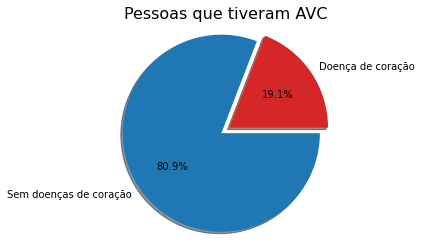

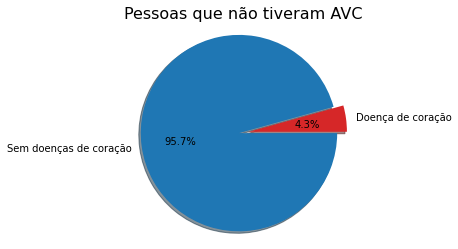

In [16]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Doença de coração', 'Sem doenças de coração'

sizes = [stroke_yes.heart_disease.value_counts()[1]/stroke_yes.shape[0],
         stroke_yes.heart_disease.value_counts()[0]/stroke_yes.shape[0],
         
         stroke_no.heart_disease.value_counts()[1]/stroke_no.shape[0],
         stroke_no.heart_disease.value_counts()[0]/stroke_no.shape[0] ]

explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')


fig1, ax1 = plt.subplots()
ax1.pie(sizes[0:2], explode=explode, labels=labels,colors = ['tab:red','tab:blue'], autopct='%1.1f%%',
        shadow=True, startangle=0)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Pessoas que tiveram AVC",size = 16)
plt.show()


fig1, ax1 = plt.subplots()
ax1.pie(sizes[2:4], explode=explode, labels=labels,colors = ['tab:red','tab:blue'], autopct='%1.1f%%',
        shadow=True, startangle=0)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Pessoas que não tiveram AVC",size = 16)

plt.show()

# Nível de glicose no sangue

In [17]:
stroke.avg_glucose_level.describe()

count    4908.000000
mean      105.297402
std        44.425550
min        55.120000
25%        77.067500
50%        91.680000
75%       113.495000
max       271.740000
Name: avg_glucose_level, dtype: float64

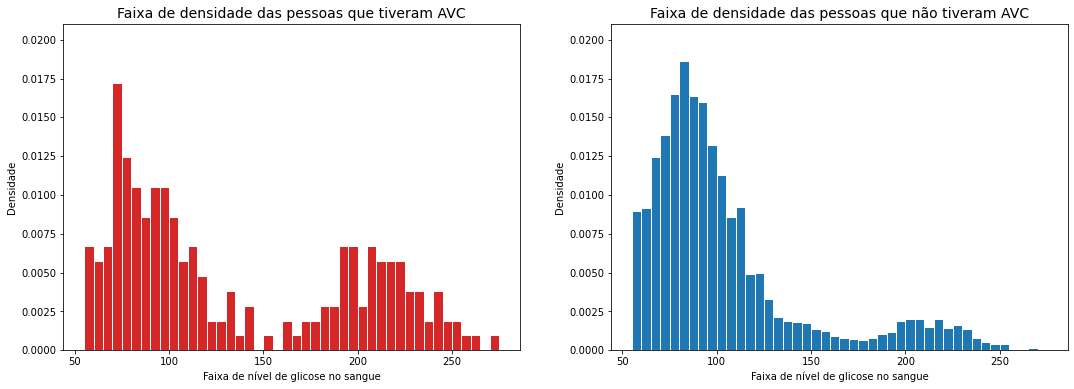

In [24]:
glucose_range = np.arange(55, 280,5)

plt.figure(figsize=(18,6))

plt.subplot(121)
plt.hist(stroke_yes.avg_glucose_level, bins = glucose_range, edgecolor='white', density = True, color = 'tab:red')
plt.title("Faixa de densidade das pessoas que tiveram AVC", size=14)
plt.xlabel("Faixa de nível de glicose no sangue")
plt.ylabel("Densidade")
plt.ylim(0,0.021)

plt.subplot(122)
plt.hist(stroke_no.avg_glucose_level, bins = glucose_range, edgecolor='white', density = True, color = 'tab:blue')
plt.title("Faixa de densidade das pessoas que não tiveram AVC", size=14)
plt.xlabel("Faixa de nível de glicose no sangue")
plt.ylabel("Densidade")
plt.ylim(0,0.021)


plt.show()

# Índice de massa corporal

In [25]:
stroke.bmi.describe()

count    4908.00000
mean       28.89456
std         7.85432
min        10.30000
25%        23.50000
50%        28.10000
75%        33.10000
max        97.60000
Name: bmi, dtype: float64

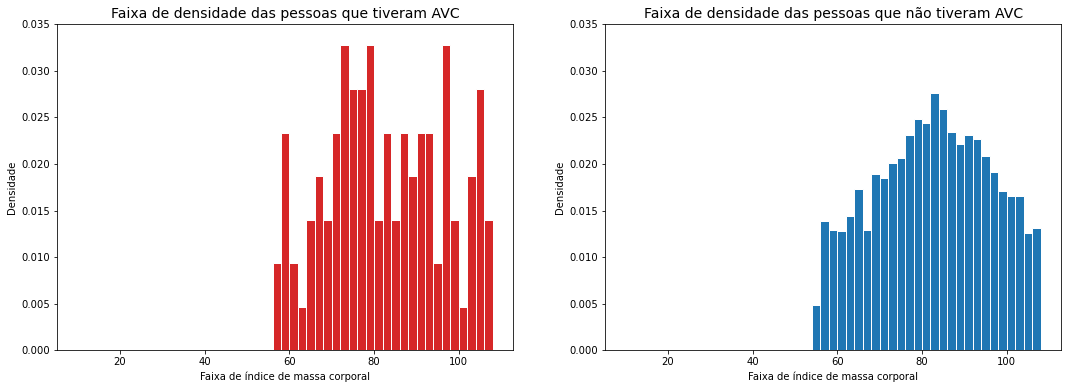

In [28]:
bmi_range = np.arange(10, 110,2)

plt.figure(figsize=(18,6))

plt.subplot(121)
plt.hist(stroke_yes.avg_glucose_level, bins = bmi_range, edgecolor='white', density = True, color = 'tab:red')
plt.title("Faixa de densidade das pessoas que tiveram AVC", size=14)
plt.xlabel("Faixa de índice de massa corporal")
plt.ylabel("Densidade")
plt.ylim(0,0.035)

plt.subplot(122)
plt.hist(stroke_no.avg_glucose_level, bins = bmi_range, edgecolor='white', density = True, color = 'tab:blue')
plt.title("Faixa de densidade das pessoas que não tiveram AVC", size=14)
plt.xlabel("Faixa de índice de massa corporal")
plt.ylabel("Densidade")
plt.ylim(0,0.035)


plt.show()